###### <h2><center>Module 11: Advanced Regression Methods</center></h2>
<h4><center>Required Assignment - 2</center></h4>

#### Instructions: 
Prepare a Python notebook to build, train and evaluate a linear regression model given the dataset. Please read the instructions carefully.

#### Business Case: 
Build regression models to predict car price based on various features given:

#### Task: Car Price Dataset

1.	Import Libraries/Dataset (1 mark)

    •	Import the required libraries and the dataset 
    

2.	Data Visualisation and Augmentation (0.5*6 = 3 marks)

    •	Plot at least two EDA graphs (use matplotlib/seaborn/any other library)
    
    •	Check for assumptions of linear regression
    
    •	Bring the train and test data in the required format
    
    •	Perform missing values check 
    
    •	Perform scaling of data
    
    •	Print the shapes of train and test data



   
3.	Decision Tree Regression Model Building (0.5*3 = 1.5 marks)

    •	Build a decision tree regression model
    
    •	Train the model on the train dataset 
    
    •	Print the model summary

    

4.	Random Forest Regression Model Building (0.5*3 = 1.5 marks)

    •	Build a random forest regression Model 
    
    •	Train the model on the train dataset 
    
    •	Print the model summary

  
    
5.	Model Evaluation (1 + 1 = 2 marks)

    •	Print the final train and validation RMSE and MSE for both models 
    
    •	Check for other evaluation metrics like MAE and R2 and explain which one should be used to evaluate this model (consider the business case)


6.	Compare the performance of decision tree regression and random forest regression models for given dataset (1 mark)


<h3><center>Solutions </center></h3>

1. Import Libraries/Dataset (1 mark)

    • Import the required libraries and the dataset

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

car_price_data = pd.read_csv('CarPrice_Assignment.csv')
car_price_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


2. Data Visualisation and Augmentation (0.5*6 = 3 marks)

    • Plot at least two EDA graphs (use matplotlib/seaborn/any other library)

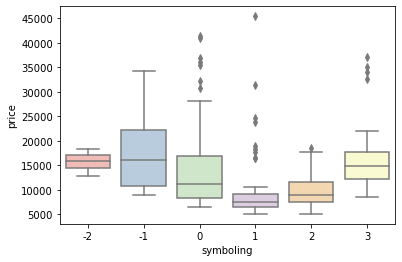

In [2]:
sns.boxplot(x = 'symboling', y = 'price', data = car_price_data,palette='Pastel1');

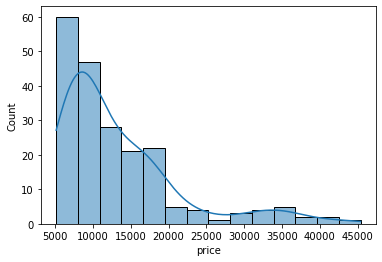

In [3]:
sns.histplot(car_price_data['price'],kde=True);

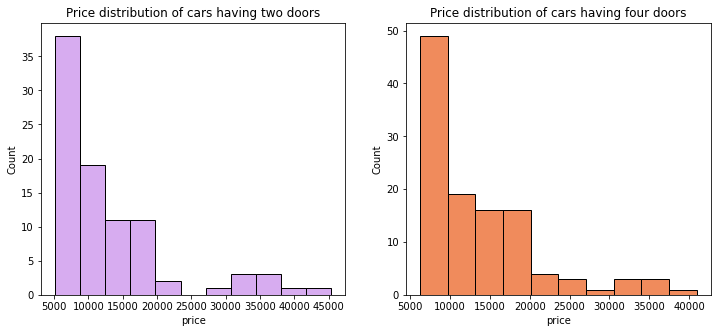

In [4]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.histplot(car_price_data[(car_price_data.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having two doors');

ax=f.add_subplot(122)
plot=sns.histplot(car_price_data[(car_price_data.doornumber == 'four')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having four doors');

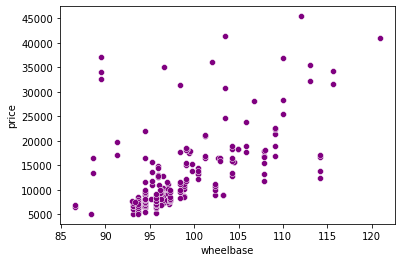

In [5]:
sns.scatterplot(x="wheelbase", y="price", data=car_price_data,color='purple');

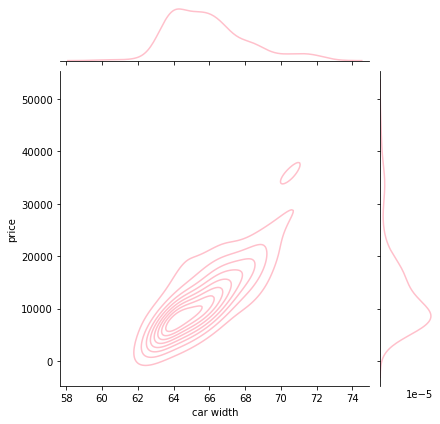

In [6]:
g = sns.jointplot(x="carwidth", y="price", data=car_price_data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

• Perform missing values check

In [7]:
car_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
label = preprocessing.LabelEncoder()
car_price_data['drivewheel'] = label.fit_transform(car_price_data['drivewheel'])
car_price_data['carbody'] = label.fit_transform(car_price_data['carbody'])
car_price_data['cylindernumber'] = label.fit_transform(car_price_data['cylindernumber'])
car_price_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,0,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,0,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,2,2,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,3,1,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,3,0,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# Checking Null values
car_price_data.isnull().sum()*100/car_price_data.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

• Bring the train and test data in the required format

In [10]:
features = ["carbody","drivewheel","cylindernumber", "curbweight", "horsepower", "peakrpm", "citympg", "highwaympg"]
X = car_price_data[features]
y = car_price_data["price"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

• Print the shapes of train and test data

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((143, 8), (62, 8), (143,), (62,))

• Perform scaling of data

In [13]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Model Building (0.5*3 = 1.5 marks)

    • Build a simple linear regression model using TV as input predictor and sales as target variable

    • Train the model on the train dataset

    • Print the model summary

In [14]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [15]:
prediction = tree.predict(X_test_scaled)

In [16]:
tree.score(X_test_scaled,prediction)

1.0

In [17]:
print("MAE for Decision Tree",mean_absolute_error(y_test,prediction))
mse_dt = mean_squared_error(y_test,prediction)
print("MSE for Decision Tree: ", mse_dt)
rmse_dt = np.sqrt(mse_dt)
print("Root Mean Sqaured Error for Decision Tree: ", rmse_dt)
print("R2-score for Decision Tree : ", r2_score(y_test,prediction))

MAE for Decision Tree 1998.8118225806452
MSE for Decision Tree:  10563770.740385305
Root Mean Sqaured Error for Decision Tree:  3250.1954926412204
R2-score for Decision Tree :  0.8475302665315981


5. Model Evaluation (1 + 1 = 2 marks)

    • Print the final train and validation RMSE and MSE for both models

    • Check for other evaluation metrics like MAE and R2 and explain which one should be used to evaluate this model (consider the business case)

In [18]:
Rf = RandomForestRegressor(n_estimators = 15, criterion = 'squared_error', random_state = 42, n_jobs = -1)
Rf.fit(X_train_scaled,y_train)
Rf_train_pred = Rf.predict(X_train_scaled)
Rf_test_pred = Rf.predict(X_test_scaled)
r2_score(y_test,Rf_test_pred)

RandomForestRegressor(n_estimators=15, n_jobs=-1, random_state=42)

0.9362061565380955

In [19]:
print("MAE for Random Forest",mean_absolute_error(y_test,Rf_test_pred))
print("MSE for Random Forest",mean_squared_error(y_test,Rf_test_pred))
mse_rf = mean_squared_error(y_test,Rf_test_pred)
rmse_rf = np.sqrt(mse_rf)
print("RMSE for Random Forest", rmse_rf)
print("R2 score for Random Forest",r2_score(y_test,Rf_test_pred))

MAE for Random Forest 1431.716446236559
MSE for Random Forest 4419916.803483156
RMSE for Random Forest 2102.359817795982
R2 score for Random Forest 0.9362061565380955


The Mean squared error represents the error of the estimator or predictive model created based on the given set of observations in the sample. Intuitively, the MSE is used to measure the quality of the model based on the predictions made on the entire training dataset vis-a-vis the true label/output value. In other words, it can be used to represent the cost associated with the predictions or the loss incurred in the predictions. And, the squared loss is advantageous because they exaggerate the difference between the true value and the predicted value. Two or more regression models created using a given sample of data can be compared based on their MSE. The lesser the MSE, the better the regression model is. When the linear regression model is trained using a given set of observations, the model with the least mean sum of squares error is selected as the best model.

6. Compare the performance of decision tree regression and random forest regression models for given dataset (1 mark)

### Comparision between Decision Tree and Random Forest Models

The random forest is the combination of multiple decision trees which is the class of dataset, some decision trees out of it may give the correct output and others may not give it correctly, but all trees together predict a correct output, whereas the decision trees use an algorithm to decide node and sub-nodes, a node can be split into two or more sub-nodes, by creating sub-nodes it gives another homogeneous sub-nodes, we can say that the nodes have been increases with respect to the target value. The split is done with the highest information that will be taken in the first place, also the process has been continued until all the children nodes have consistent data.

Complexity: The decision tree is a simple series of decisions made to get the specific results, it is used for both classification and regression. The advantage of the simple decision tree is that this model is easy to interpret and while building decision trees we aware of which variable and what is the value of the variable is using to split the data, and due to that the output will be predicted fast, on the other hand, the random forest is more complex as there is a combination of decision trees while building a random forest we have to define the number of trees we want to build and how many variables we need at each node.
Accuracy: Random forest predicts more accurate results than the decision trees. It is the supervised learning algorithm in machine learning that it uses the bagging method so that there is a combination of learning models which increases the accuracy of results, we can also say that random forests build up many decision trees and that combines together which gives a stable and accurate result, when we are using an algorithm to solve the regression problem in a random forest there is a formula to get an accurate result for each node, whereas the accuracy in the decision tree depends on the number of the correct prediction made divided by total numbers of predictions, as it uses large value attribute at each node, it gives less accurate results decision tree is greedy and it may be deterministic, so if we add one more row or if we take out any row then they give different results.
Overfitting: Overfitting is the critical issue in machine learning, when we use algorithms then there is a risk of overfitting which can be considered as a general bottleneck in machine learning. Overfitting happens when the models learn fluctuation data in the training data which impacted a negative performance on the new data model, when machine learning model cannot fill well on unseen dataset then that is a sign of overfitting if this error is found on the testing or validation dataset is much for the error on the training dataset.
The decision tree has more possibility of overfitting whereas random forest reduces the risk of it because it uses multiple decision trees.
When we using a decision tree model on a given dataset the accuracy going improving because it has more splits so that we can easily overfit the data and validates it.